# **Trabajo Práctico Nª 2**: "Regresión  del VM de casas en districtos de California"

**Alumno:** David Canal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# **Pregunta 1**

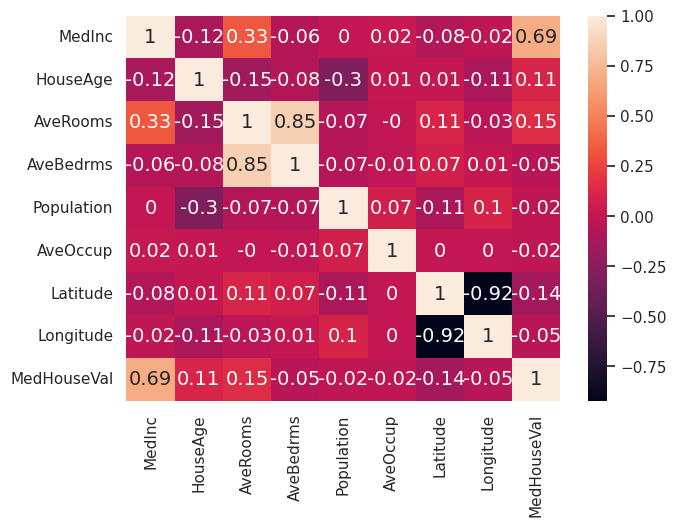

In [ ]:
# Unimos a X e y, para la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

# Mapa de Colores
plt.figure(figsize=(7, 5))
correlacion_profit = df_california.corr().round(2)
sns.heatmap(data=correlacion_profit, annot=True, annot_kws={"size": 14})
plt.show()

# **Pregunta 2**

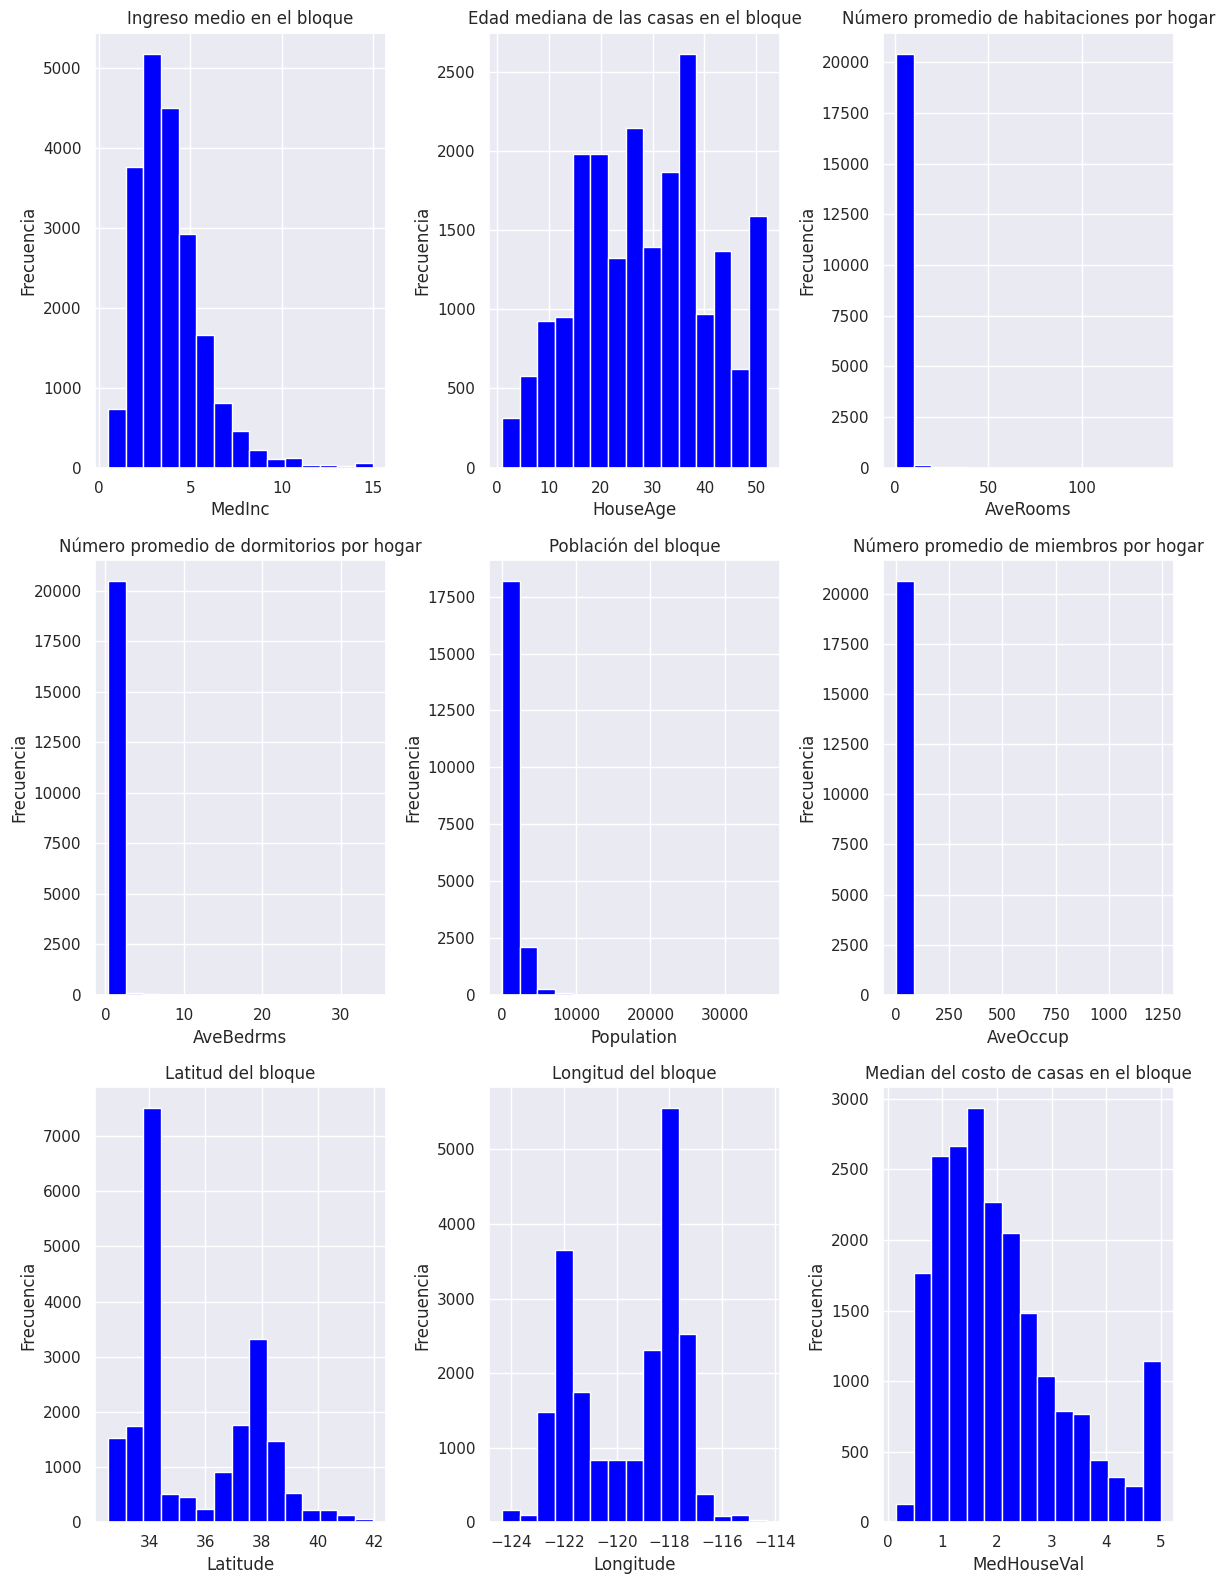

In [ ]:
columnas = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population",
            "AveOccup", "Latitude", "Longitude","MedHouseVal"]
title = ["Ingreso medio en el bloque","Edad mediana de las casas en el bloque",
         "Número promedio de habitaciones por hogar","Número promedio de dormitorios por hogar",
         "Población del bloque","Número promedio de miembros por hogar","Latitud del bloque",
         "Longitud del bloque","Median del costo de casas en el bloque"]

# Creamos la figura y los ejes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 16))

# Ploteamos cada figura
for i, col in enumerate(columnas):
    num_bins = int(1 + np.log2(len(df_california[columnas[i]])))
    row = i // 3  # Calcular el número de fila
    col = i % 3   # Calcular el número de columna
    df_california[columnas[i]].hist(ax=axs[row, col],bins= num_bins,color= 'blue')
    axs[row, col].set_title(title[i])
    axs[row, col].set_xlabel(columnas[i])
    axs[row, col].set_ylabel('Frecuencia')

# Ajustar automáticamente el espacio entre los subplots para evitar solapamiento
plt.tight_layout()

# Mostrar la figura con los histogramas
plt.show()


# **Pregunta 3** : "Regresión Lineal"

In [ ]:
# Armamos un DataFrame con los features
X = df_california.drop(columns='MedHouseVal')
# Y con la variable dependiente (target)
y = df_california["MedHouseVal"]

# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Estandarizamos las variables
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)

# Realizamos la regresión
regresion = LinearRegression()
regresion.fit(X_train_scaled, y_train)

# Varianza de la variable dependiente de los datos
var_vd      = np.var(y_train)
# Parte de la Varianza explicada por el modelo
var_model   = np.var(regresion.predict(X_train_scaled))
# Parte que no es explicada: "Residio"
var_residuo = var_vd - var_model

print(f"Varianza de la variable dependiente del modelo: {var_vd}")
print(f"Parte explicada por el modelo: {var_model}")
print(f"Parte no explicada por el modelo: {var_residuo}")

Varianza de la variable dependiente del modelo: 1.3396959774719193
Parte explicada por el modelo: 0.8163383486451428
Parte no explicada por el modelo: 0.5233576288267765


#**Pregunta 4:** "Métricas de Evaluación"

In [ ]:
#Tenemos las predicciones del modelo
X_test_scaled = sc_X.fit_transform(X_test)
y_pred = regresion.predict(X_test_scaled)
#scikit-learn no tiene el error porcentual medio (MPE) lo vamos a crear nosotros
def mean_porcentual_error(yreal, ypred):
    return np.mean((yreal-ypred)/yreal)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Error cuadratico medio:", mse)
print("Error absoluto medio:", mae)
print("R-cuadrado en test:", r2)

Error cuadratico medio: 0.5165967398485735
Error absoluto medio: 0.5238759626552133
R-cuadrado en test: 0.6064145112418659


#**Pregunta 5**: "Regresión de Ridge"

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
alphas = np.linspace(0, 12.5, 1000)
# Calcular el MSE para cada valor de alpha usando validación cruzada de 5-folds
mse_scores = []

for alpha in alphas:
  ridge_model = Ridge(alpha=alpha)
  scores = -cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
  mse_scores.append(scores.mean())

# Mejor valor de alpha
best_alpha = alphas[np.argmin(mse_scores)]
print(f"Mejor valor de alpha: {best_alpha}")

Mejor valor de alpha: 6.519019019019019


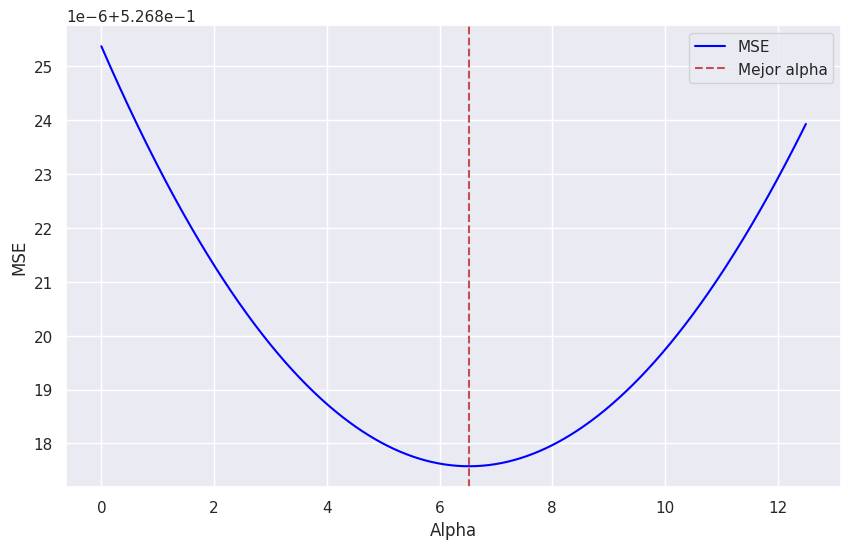

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_scores, color = 'blue',label='MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.axvline(x=best_alpha, color='r', linestyle='--', label='Mejor alpha')
plt.legend()
plt.show()

#**Pregunta 6:** "Comparación de modelos"

In [ ]:
# Modelos a comparar
'Modelo Lineal'
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
'Modelo de Ridge'
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)

# Predicción sobre el conjunto de evaluación
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Cálculo de MSE y MAE para ambos modelos

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("MSE-linear:", mse_linear)
print("MSE-Ridge:", mse_ridge)
print("Diferencia MSE",((mse_linear-mse_ridge)*100)/mse_linear)
print("MAE-linear:", mae_linear)
print("MAE-Ridge:", mae_ridge)
print("Diferencia MSE",((mae_linear-mae_ridge)*100)/mae_linear)

MSE-linear: 0.5165967398485735
MSE-Ridge: 0.5165221238999391
Diferencia MSE 0.014443751359369693
MAE-linear: 0.5238759626552133
MAE-Ridge: 0.5238331459594068
Diferencia MSE 0.008173059819258057


In [2]:
.5239-.5238


9.999999999998899e-05